In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#load the data
df=pd.read_csv("/content/housing.csv")
df.head(10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [ ]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:

df.fillna(df["total_bedrooms"].mean(),inplace=True)

In [ ]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [ ]:
df.shape

(20640, 10)

In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

<ipython-input-375-348b8ec84c7d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


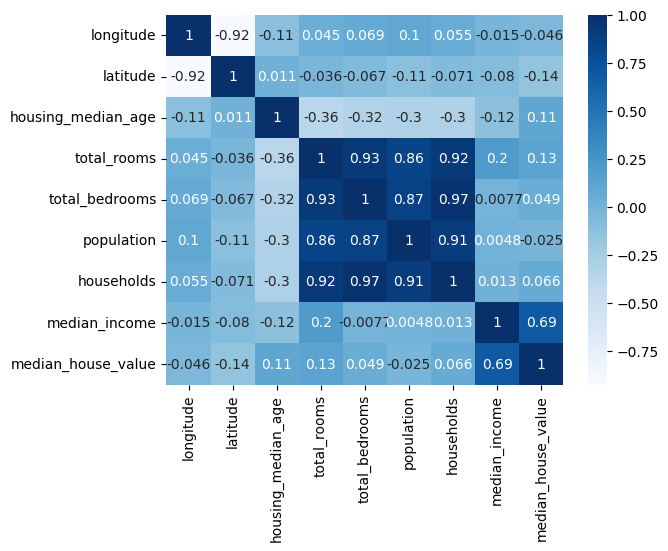

In [ ]:
corr=df.corr()
sns.heatmap(corr,annot=True,cmap="Blues")
plt.show()

In [ ]:

x=df.drop(["median_house_value","ocean_proximity"],axis=1)
x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462


In [ ]:
y=df["median_house_value"]
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
print("x_train:",x_train.shape)
print("y_train:",y_train.shape)
print("x_test:",x_test.shape)
print("y_test:",y_test.shape)


x_train: (16512, 8)
y_train: (16512,)
x_test: (4128, 8)
y_test: (4128,)


In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
regressor.score(x_test,y_test)

0.6348780580006248

In [ ]:
regressor.intercept_

-3576418.0769588915

In [ ]:
regressor.coef_

array([-4.27118784e+04, -4.26576803e+04,  1.11421004e+03, -7.23714721e+00,
        8.29113793e+01, -3.80053945e+01,  7.72246769e+01,  3.98384882e+04])

In [ ]:
y_pred=regressor.predict(x_test)
y_pred

array([280831.5087618 , 137431.67062065, 244744.69653398, ...,
        40453.86529043, 254433.89689674, 160244.68132548])

In [ ]:
df1=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
df1

,Actual,Predicted
14685,177400.0,280831.508762
14278,78500.0,137431.670621
18462,261100.0,244744.696534
10747,93800.0,186412.944061
3226,50400.0,70436.883899
...,...,...
12244,85700.0,152989.675518
5292,500001.0,493382.663699
19762,55000.0,40453.865290
8744,357000.0,254433.896897


In [ ]:
#mean_square_Error
mse=np.mean((df1.Predicted-df1.Actual)**2)
mse

4815907547.10788